In [1]:
import ipywidgets
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

# at fix x-interval
data = [
    ['very sad', 1],
    ['slightly sad', 6],
    ['sad', 14],
    ['happy', 16],
    ['joyful', 20],
]

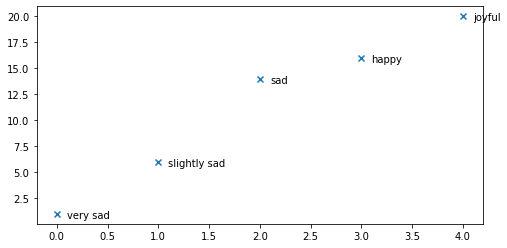

In [2]:
lowest, highest = data[0][1], data[-1][1]
x_pos = np.array(list(range(len(data))))
y_pos = np.array([d[1] for d in data])
def plot_data():
    fig, ax = plt.subplots(figsize=(8,4))
    plt.scatter(x_pos, y_pos, marker='x')
    for _x, _y, (label, _) in zip(x_pos, y_pos, data):
        ax.annotate(label, (_x+.1, _y-.4))  # draw label (very sad, slightly sad, ...)
    return fig, ax

fig, ax = plot_data()

# Fit curve

Using the following curve fitting

$a \cdot x^4 + b \cdot x^3 + c \cdot x^2 + d \cdot x + e$

/home/soraxas/.pyenv/versions/miniconda3-latest/envs/res37/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


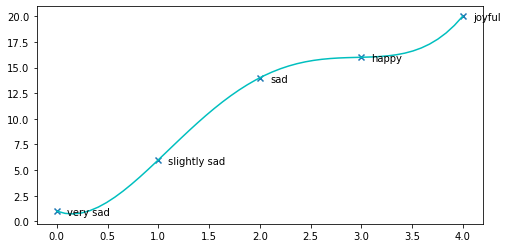

The optimised a, b, c, d, e factor are:
[0.7083333333333283, -5.749999999999964, 13.79166666666659, -3.749999999999955, 1.0]


In [3]:
def func(x, a, b, c, d, e):
    return a * x**4 + b*x**3 + c*x**2 + d*x**1 + e

popt, pcov = curve_fit(func, x_pos, y_pos)

fig, ax = plot_data()
newx_for_plotting = np.linspace(0, 4)
ax.plot(newx_for_plotting, func(newx_for_plotting, *popt), 'c-')
plt.show()

print('='*60)
print("The optimised a, b, c, d, e factor are:")
print(list(popt))
print('='*60)

In [4]:
@ipywidgets.interact(x=ipywidgets.FloatSlider(description="Slide me!!!", min=0, max=len(data)-1, step=0.1, value=len(data)//2, readout=False))
def draw_figure(x):
    calculated_y = func(x, *popt)
        
    fig, ax = plot_data()  # plot data
    ax.plot(newx_for_plotting, func(newx_for_plotting, *popt), 'c-')  # plot curve fit

    ax.annotate("new psychometric", (x, .77))  # draw value (1, 6, 13, ...)
    ax.vlines(x=x, ymin=0, ymax=calculated_y, colors='red', ls=':', lw=2, label='vline_single - partial height')
    
    print("="*50)
    print("new psychometric is at value {}".format(calculated_y))
    print("="*50)


interactive(children=(FloatSlider(value=2.0, description='Slide me!!!', max=4.0, readout=False), Output()), _d…